# Data Analysis

In [52]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for the yeo-johnson transformation
import scipy.stats as stats

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from sklearn.model_selection import train_test_split

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

### Dataset

In [5]:
# load dataset
df = pd.read_csv('dataset/brain_stroke.csv')

# rows and columns of the data
print(df.shape)

# visualise the dataset
df.head()

(4981, 11)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


### Target

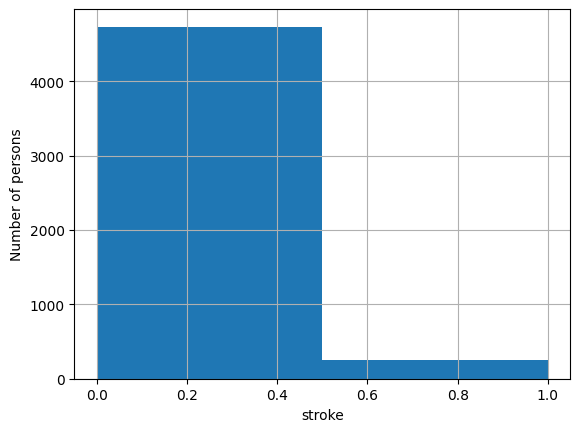

In [20]:
df['stroke'].hist(bins=2)
plt.ylabel('Number of persons')
plt.xlabel('stroke')
plt.show()

### Missing values

In [44]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


### Dataframe info

In [45]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB
None


### Categorical columns

In [21]:
cat_columns = df.select_dtypes(include=['object']).columns
print("Categorical columns:", cat_columns)

Categorical columns: Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


In [22]:
unique_results = []
for col in cat_columns:
    unique_values = df[col].unique()  
    unique_count = len(unique_values)
    unique_results.append({'Колонка': col, 'Уникальные значения': list(unique_values), 'Количество': unique_count})

results_df = pd.DataFrame(unique_results)

results_df

,Колонка,Уникальные значения,Количество
0,gender,"[Male, Female]",2
1,ever_married,"[Yes, No]",2
2,work_type,"[Private, Self-employed, Govt_job, children]",4
3,Residence_type,"[Urban, Rural]",2
4,smoking_status,"[formerly smoked, never smoked, smokes, Unknown]",4


In [41]:
mappings = {}

new_df = df.copy()
for col in cat_columns:
    unique_values = df[col].unique()
    unique_count = len(unique_values)
    if unique_count == 2:
        dummy_mapping = {unique_values[0]: 0, unique_values[1]: 1}
        new_df[col] = new_df[col].map(dummy_mapping)
        mappings[col] = dummy_mapping
    else:
        label_encoder = LabelEncoder()
        new_df[col] = label_encoder.fit_transform(df[col])
        mappings[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

new_df.head()

gender
ever_married
work_type
Residence_type
smoking_status


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,0,1,0,228.69,36.6,1,1
1,0,80.0,0,1,0,1,1,105.92,32.5,2,1
2,1,49.0,0,0,0,1,0,171.23,34.4,3,1
3,1,79.0,1,0,0,2,1,174.12,24.0,2,1
4,0,81.0,0,0,0,1,0,186.21,29.0,1,1


In [48]:
print("\nПривязка категорий:")
for col, mapping in mappings.items():
    print(f"{col}: {mapping}")


Привязка категорий:
gender: {'Male': 0, 'Female': 1}
ever_married: {'Yes': 0, 'No': 1}
work_type: {'Govt_job': 0, 'Private': 1, 'Self-employed': 2, 'children': 3}
Residence_type: {'Urban': 0, 'Rural': 1}
smoking_status: {'Unknown': 0, 'formerly smoked': 1, 'never smoked': 2, 'smokes': 3}


In [34]:
unique_results = []
for col in cat_columns:
    unique_values = new_df[col].unique()  
    unique_count = len(unique_values)
    unique_results.append({'Колонка': col, 'Уникальные значения': list(unique_values), 'Количество': unique_count})

results_df = pd.DataFrame(unique_results)

results_df

,Колонка,Уникальные значения,Количество
0,gender,"[0, 1]",2
1,ever_married,"[0, 1]",2
2,work_type,"[1, 2, 0, 3]",4
3,Residence_type,"[0, 1]",2
4,smoking_status,"[1, 2, 3, 0]",4


### Binary columns

Binary columns: ['gender', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'stroke']


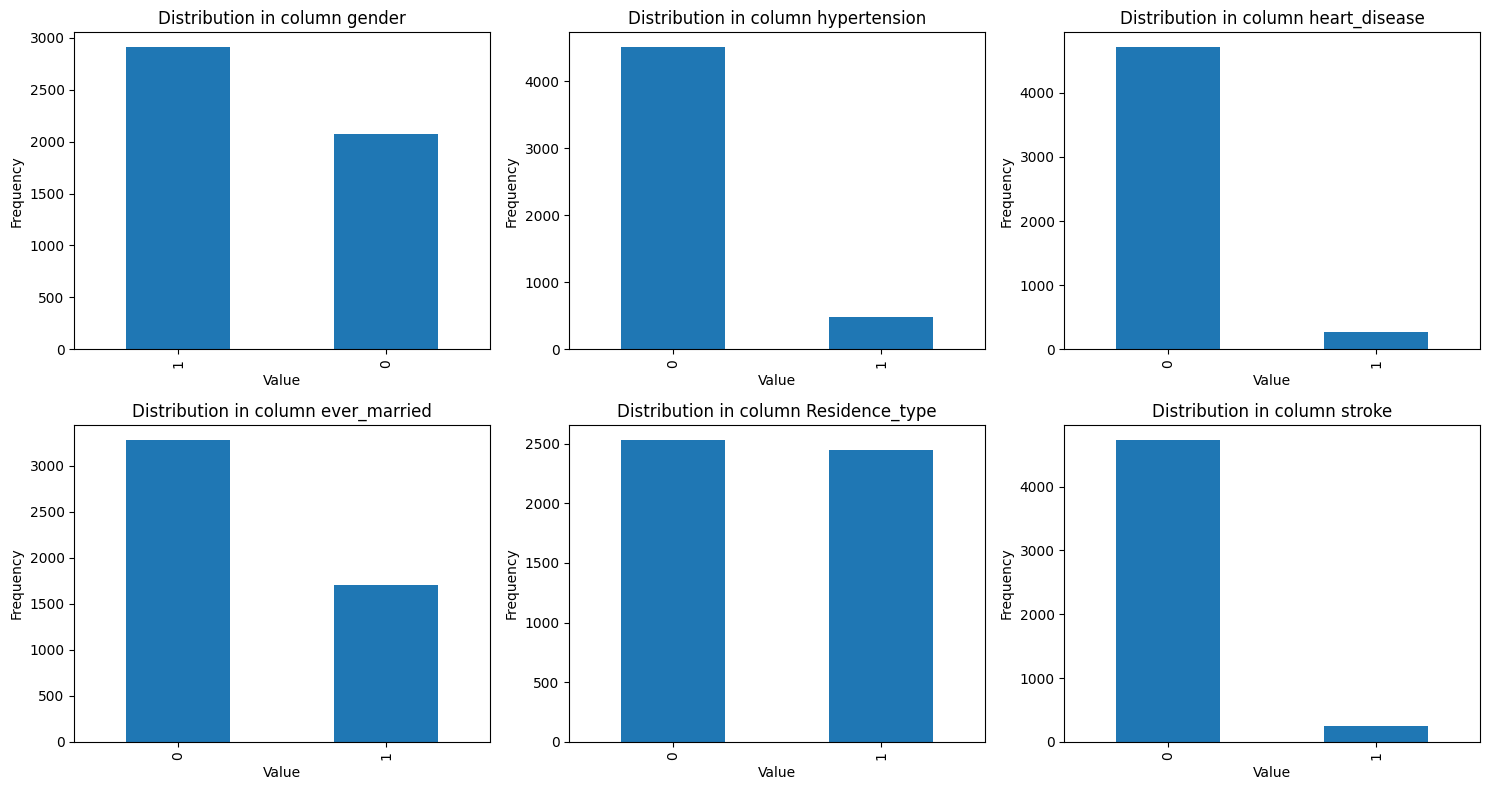

In [60]:
binary_columns = [column for column in new_df.columns if new_df[column].nunique() == 2]
print("Binary columns:", binary_columns)

# определяем количество столбцов и строк в сетке субплотов
num_cols = 3
num_rows = (len(binary_columns) + num_cols - 1) // num_cols  # вычисляем необходимое количество строк

# создаем фигуру и массив субплотов
fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 4 * num_rows))

# если у нас меньше графиков, чем субплотов, убираем лишние оси
if len(binary_columns) < num_cols * num_rows:
    for i in range(len(binary_columns), num_cols * num_rows):
        fig.delaxes(axes[num_rows - 1, i % num_cols])

# формируем графики
for i, column in enumerate(binary_columns):
    ax = axes[i // num_cols, i % num_cols]
    new_df[column].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(f'Distribution in column {column}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# улучшаем расположение графиков
plt.tight_layout()
plt.show()

### Non-binary columns

In [67]:
non_binary_columns = [column for column in new_df.columns if new_df[column].nunique() > 2]
print("Non-binary columns:", non_binary_columns)

Non-binary columns: ['age', 'work_type', 'avg_glucose_level', 'bmi', 'smoking_status']


In [77]:
def printNonBinaryGraphics(key):
    # Создадим графики
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Гистограмма
    sns.histplot(new_df[key], bins=30, ax=axes[0], kde=True)
    axes[0].set_title('Гистограмма')
    
    # Боксплот
    sns.boxplot(x=new_df[key], ax=axes[1])
    axes[1].set_title('Боксплот')
    
    # Настройки для более плотной компоновки графиков
    plt.tight_layout()
    plt.show()

Non-binary columns: ['age', 'work_type', 'avg_glucose_level', 'bmi', 'smoking_status']


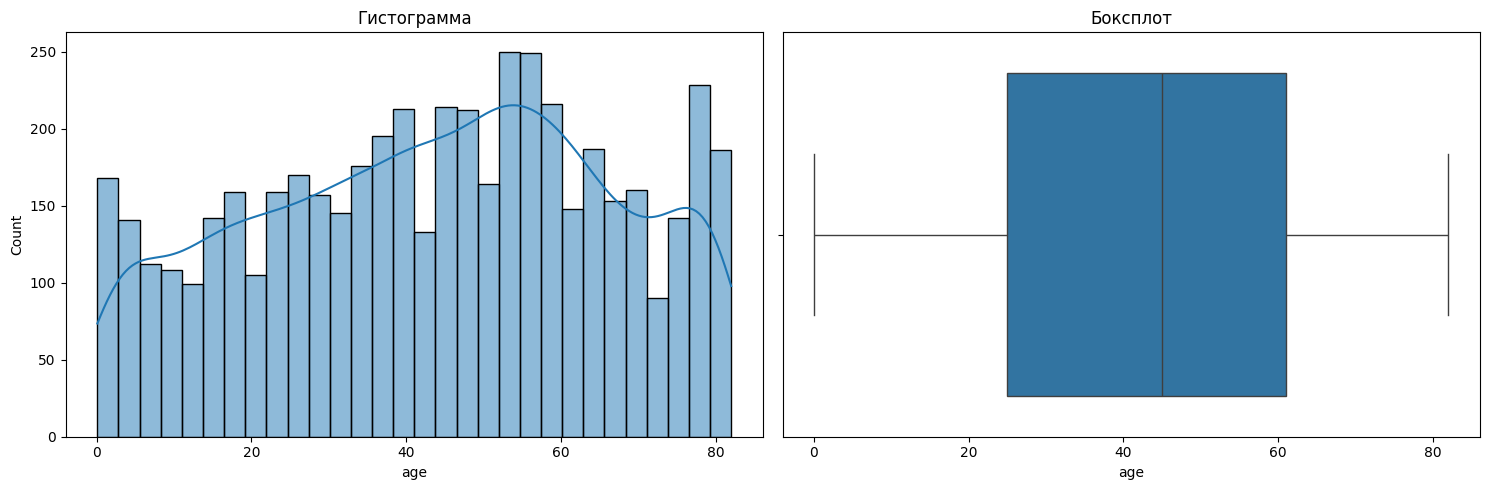

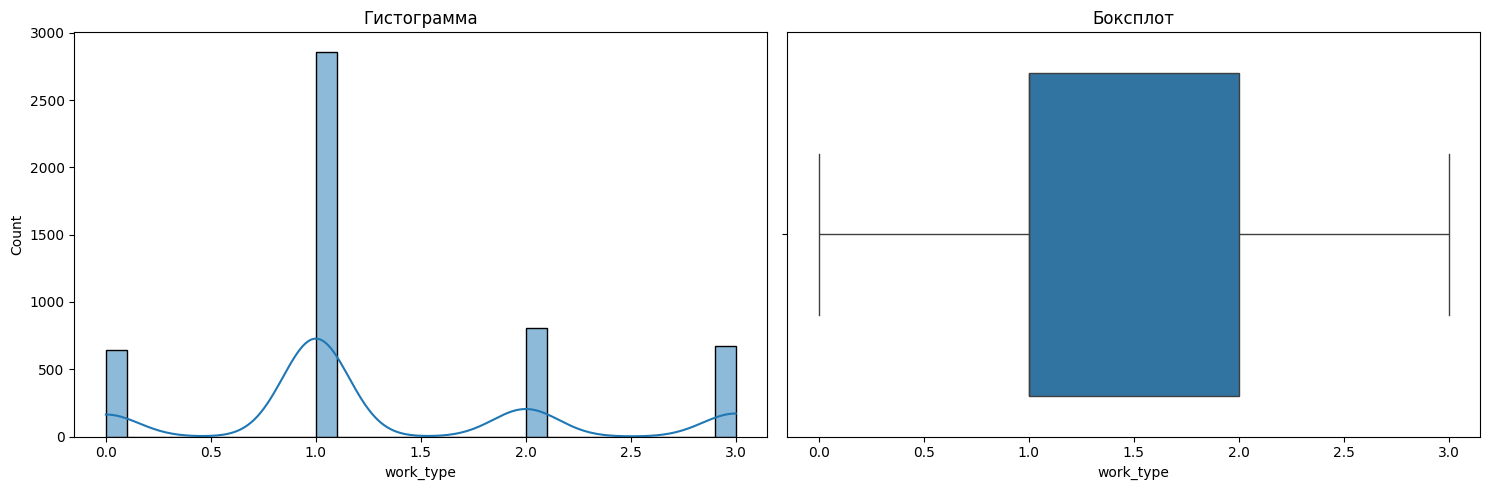

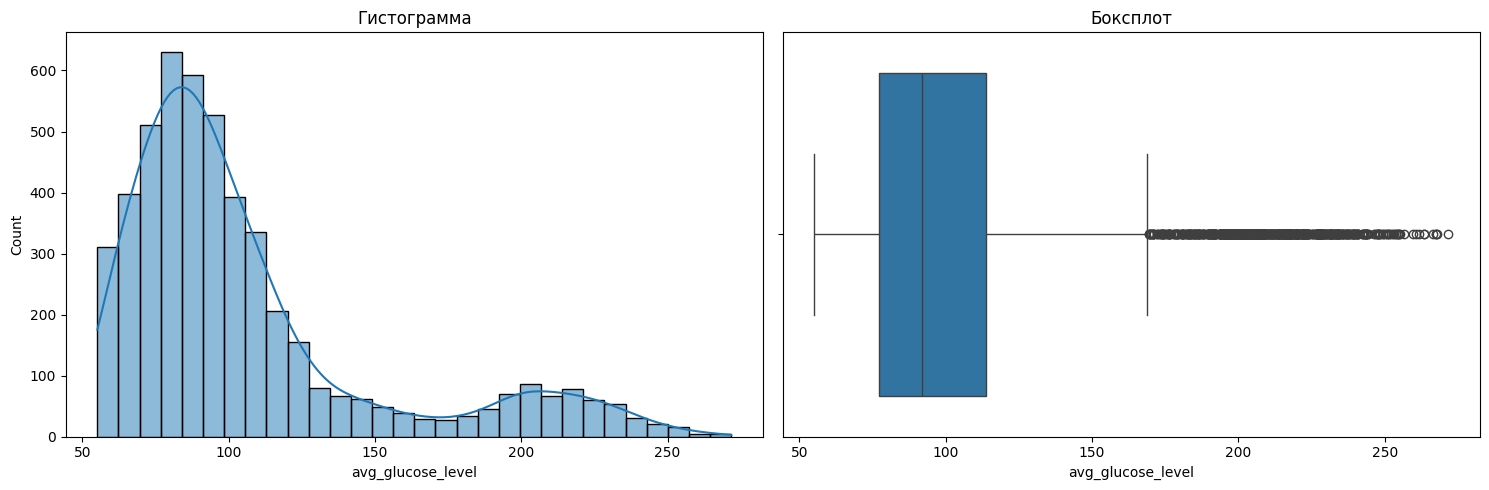

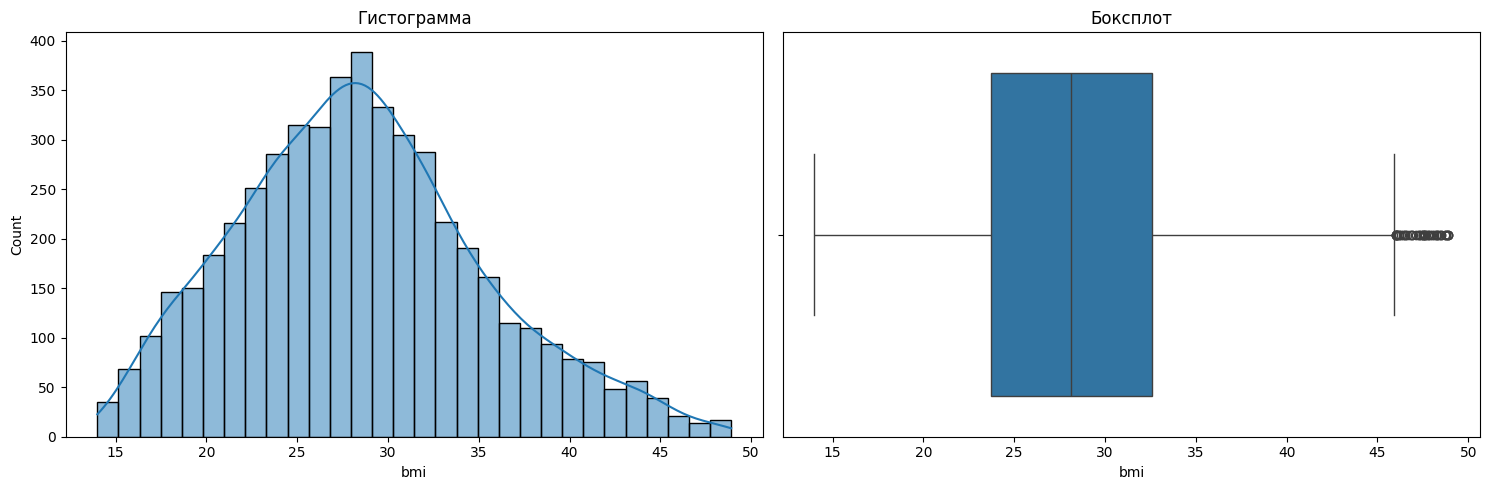

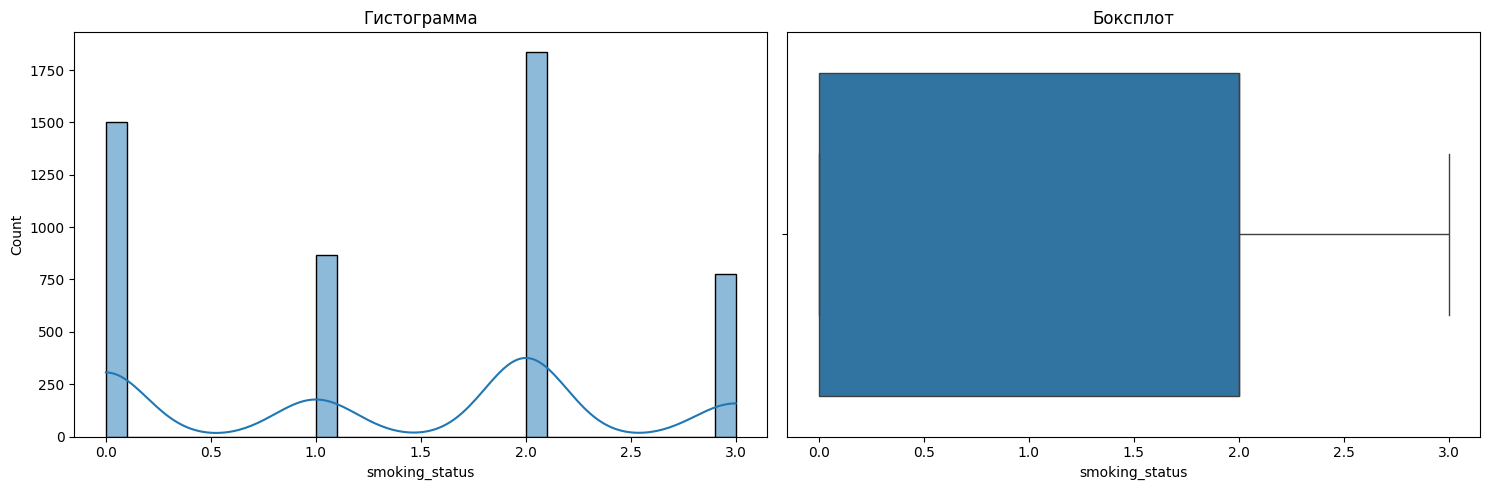

In [82]:
non_binary_columns = [column for column in new_df.columns if new_df[column].nunique() > 2]
print("Non-binary columns:", non_binary_columns)

for col in non_binary_columns:
    printNonBinaryGraphics(col)

### Preprocessed dataset

In [55]:
result_df = new_df.copy()
result_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,0,1,0,228.69,36.6,1,1
1,0,80.0,0,1,0,1,1,105.92,32.5,2,1
2,1,49.0,0,0,0,1,0,171.23,34.4,3,1
3,1,79.0,1,0,0,2,1,174.12,24.0,2,1
4,0,81.0,0,0,0,1,0,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,0,41.0,0,0,1,1,1,70.15,29.8,1,0
4977,0,40.0,0,0,0,1,0,191.15,31.1,3,0
4978,1,45.0,1,0,0,0,1,95.02,31.8,3,0
4979,0,40.0,0,0,0,1,1,83.94,30.0,3,0


### Dataset splitting

In [59]:
X_train, X_test, y_train, y_test = train_test_split(
    result_df.drop(['stroke'], axis=1), # predictive variables
    result_df['stroke'], # target
    test_size=0.2, # portion of dataset to allocate to test set
    random_state=0, # we are setting the seed here
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3984, 10), (997, 10), (3984,), (997,))

### Saving data

In [63]:
# Сохранение обучающего набора данных
X_train.to_csv('dataset_processed/X_train.csv', index=False)
y_train.to_csv('dataset_processed/y_train.csv', index=False)

# Сохранение тестового набора данных
X_test.to_csv('dataset_processed/X_test.csv', index=False)
y_test.to_csv('dataset_processed/y_test.csv', index=False)